# JSON Analysis Code

### Imports

In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load Data

In [2]:
import os

directory = os.fsencode('user_data/')
json_files = [json_file for json_file in os.listdir(directory)]

data = pd.DataFrame(columns=['id', 'study_condition','scenario', 'difficulty', 'error_type', 'exit_condition', 'num_foils', 'elapsed_time', 'Ds', 'D_user_belief', 
                             'user_response', 'num_changes', 'start_edit_distance', 'final_edit_distance', 'final_system_makespan'])
threshold_values = []

In [4]:
index = 0
ids = []
for js in json_files:
    with open(os.path.join(directory, js)) as f:
        json_text = json.load(f)
        id = js.decode().replace('.json', '')
        ids.append(id)
        for scenario in json_text[id]:
            study_condition = json_text[id][scenario]['study_condition']
            difficulty = json_text[id][scenario]['difficulty']
            error_type = json_text[id][scenario]['error_type']
            exit_condition = json_text[id][scenario]['exit_condition']
            number_of_foils = json_text[id][scenario]['number_of_foils']
            elapsed_time = json_text[id][scenario]['elapsed_time']
            Ds = json_text[id][scenario]['Ds']
            D_user_belief = json_text[id][scenario]['D_user_belief']
            user_response = json_text[id][scenario]['user_response']
            num_changes = json_text[id][scenario]['num_changes']
            start_edit_distance = json_text[id][scenario]['start_edit_distance']
            final_edit_distance = json_text[id][scenario]['final_edit_distance']
            final_system_makespan = json_text[id][scenario]['final_system_makespan']
            data.loc[index] = [id, study_condition, scenario, difficulty, error_type, exit_condition, number_of_foils, elapsed_time, Ds, D_user_belief, user_response, num_changes, start_edit_distance, final_edit_distance, final_system_makespan]
            # threshold_values.append(json_text[id][scenario]['threshold_data'])
            index += 1
        

In [5]:
p1 = data[data['scenario'] != 'warmup_1']
p2 = p1[p1['scenario'] != 'warmup_2']

data = p2
data

,id,study_condition,scenario,difficulty,error_type,exit_condition,num_foils,elapsed_time,Ds,D_user_belief,user_response,num_changes,start_edit_distance,final_edit_distance,final_system_makespan
2,10552,1,low_5,easier,single_I,solved,4,375,0,0,Dumptruck can not setup camp,5,5,3,3719.20459
3,10552,1,low_6,easier,single_Q,solved,1,78,0,1,N/A,3,5,5,2889.631592
4,10552,1,low_1,easier,none,solved,0,24,1,0,Speed of Firetrucks seem wrong,1,0,0,2559.476074
5,10552,1,low_3,easier,none,correctly_identified,N/A,N/A,1,1,N/A,N/A,0,0,N/A
6,10552,1,low_4,easier,multi,solved,1,125,0,0,H1 and H2 can only be done by Ambulance.,6,5,3,11375.666992
7,10552,1,low_2,easier,multi,solved,0,28,0,0,Ambulance cannot do C.,1,5,6,2772.173828
10,17510,2,low_5,easier,single_I,solved,1,258,0,0,None,3,5,2,4158.742188
11,17510,2,low_6,easier,single_Q,solved,4,196,0,0,f1 should do sd2 and f2 should do sd1 based on...,1,5,4,2913.286133
12,17510,2,low_4,easier,multi,solved,1,253,0,0,dumptruck cannot be doing H2,4,5,1,3065.059326
13,17510,2,low_2,easier,multi,solved,3,193,0,0,B1 can be done by either of the firetruck to r...,4,5,1,3277.91748


In [6]:
condition_1_data = data[data['study_condition'] == 1]
condition_2_data = data[data['study_condition'] == 2]

### Foils Asked Per Scenario Per Study Condition 

In [44]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['num_foils'][p['num_foils'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)

for i in range(len(zehtabi_data)):
    for j in range(len(zehtabi_data[i])):
        if zehtabi_data[i][j] == 'N/A':
            zehtabi_data[i][j] = 0
            
for i in range(len(our_data)):
    for j in range(len(our_data[i])):
        if our_data[i][j] == 'N/A':
            our_data[i][j] = 0

zehtabi_data = np.average(zehtabi_data, axis=0)
our_data = np.average(our_data, axis=0)


print(zehtabi_data)
print(our_data)

[0.   3.   0.5  1.   2.25 1.25]
[1.2 4.2 0.  2.4 2.4 4.2]


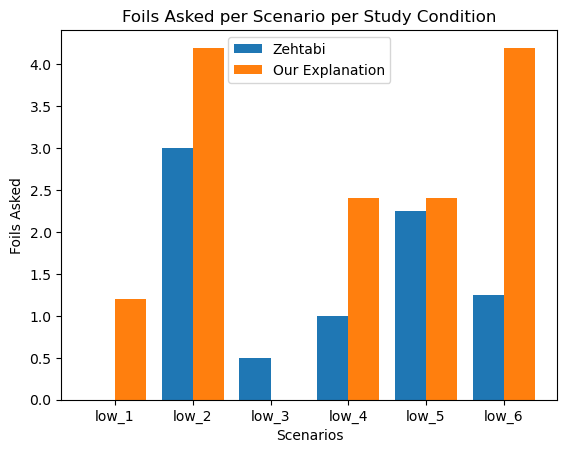

In [45]:
X = scenario_list
A = zehtabi_data
B = our_data

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, A, 0.4, label='Zehtabi et al.')
plt.bar(X_axis + 0.2, B, 0.4, label='Our Explanation')

plt.xticks(X_axis, X) 
plt.xlabel("Scenarios") 
plt.ylabel("Foils Asked") 
plt.title("Foils Asked per Scenario per Study Condition") 
plt.legend() 
plt.show() 

### Final Edit Distance Per Scenario Per Study Condition

#### Bar Graphs

In [46]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['final_edit_distance'][p['final_edit_distance'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)

zehtabi_data = np.average(zehtabi_data, axis=0)
our_data = np.average(our_data, axis=0)


print(zehtabi_data)
print(our_data)

[0.   3.5  0.   2.75 3.   4.  ]
[0.  1.6 0.  1.4 2.2 2.8]


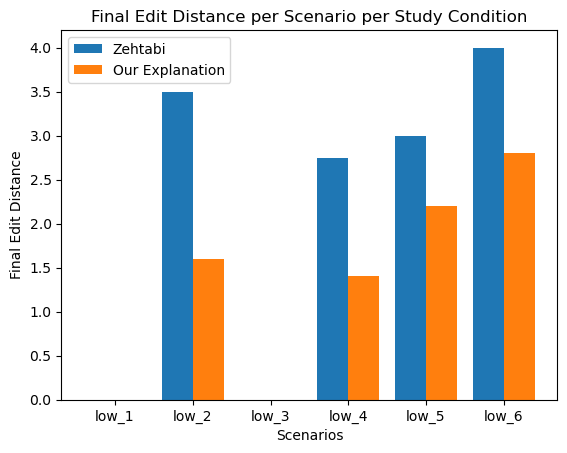

In [47]:
X = scenario_list
A = zehtabi_data
B = our_data

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, A, 0.4, label='Zehtabi et al.')
plt.bar(X_axis + 0.2, B, 0.4, label='Our Explanation')

plt.xticks(X_axis, X) 
plt.xlabel("Scenarios") 
plt.ylabel("Final Edit Distance") 
plt.title("Final Edit Distance per Scenario per Study Condition") 
plt.legend() 
plt.show() 

#### BoxPlots

In [17]:
scenario_list = ['low_2', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['final_edit_distance'][p['final_edit_distance'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)

print(zehtabi_data)
print(our_data)

zehtabi_data = np.average(zehtabi_data, axis=1)
our_data = np.average(our_data, axis=1)


print(zehtabi_data)
print(our_data)

[[6, 3, 3, 5], [4, 3, 3, 3], [1, 2, 2, 5], [3, 3, 4, 3], [4, 3, 2, 4]]
[[1, 1, 2, 4], [3, 2, 2, 2], [0, 1, 1, 2], [1, 2, 2, 2], [3, 1, 4, 4]]
[4.25 3.25 2.5  3.25 3.25]
[2.   2.25 1.   1.75 3.  ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


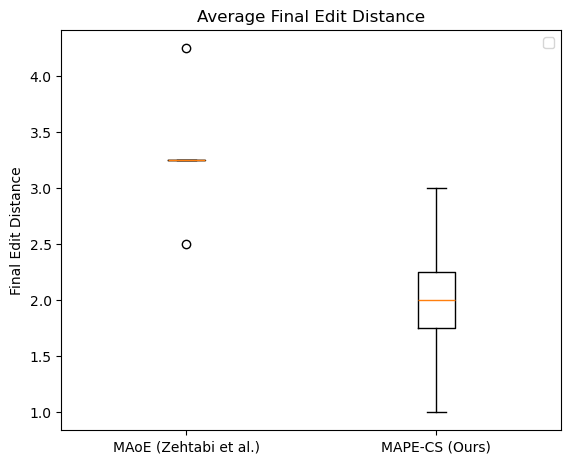

In [18]:
A = zehtabi_data
B = our_data

C = [A, B]

fig = plt.figure(figsize =(5, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(C)

plt.xticks([1, 2], ["MAoE (Zehtabi et al.)", "MAPE-CS (Ours)"])
plt.ylabel("Final Edit Distance") 
plt.title("Average Final Edit Distance") 
plt.legend() 
plt.show() 

In [11]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['final_edit_distance'][p['final_edit_distance'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)
        
        
print(zehtabi_data)
print(our_data)

[[0, 6, 0, 3, 3, 5], [0, 4, 0, 3, 3, 3], [0, 1, 0, 2, 2, 5], [0, 3, 0, 3, 4, 3], [0, 4, 0, 3, 2, 4]]
[[0, 1, 0, 1, 2, 4], [0, 3, 0, 2, 2, 2], [0, 0, 0, 1, 1, 2], [0, 1, 0, 2, 2, 2], [0, 3, 0, 1, 4, 4]]


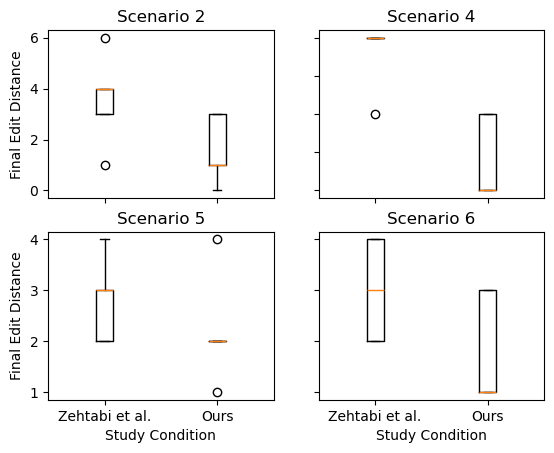

In [12]:
z2 = np.asarray(zehtabi_data)[:, 1]
o2 = np.asarray(our_data)[:, 1]

z4 = np.asarray(zehtabi_data)[:, 3]
o4 = np.asarray(our_data)[:, 3]

z5 = np.asarray(zehtabi_data)[:, 4]
o5 = np.asarray(our_data)[:, 4]

z6 = np.asarray(zehtabi_data)[:, 5]
o6 = np.asarray(our_data)[:, 5]

fig, axs = plt.subplots(2, 2)

axs[0, 0].boxplot([z2, o2])
axs[0, 0].set_title('Scenario 2')
axs[0, 1].boxplot([z4, o4])
axs[0, 1].set_title('Scenario 4')
axs[1, 0].boxplot([z5, o5])
axs[1, 0].set_title('Scenario 5')
axs[1, 1].boxplot([z6, o6])
axs[1, 1].set_title('Scenario 6')


for ax in axs.flat:
    ax.set(xlabel='Study Condition', ylabel='Final Edit Distance')
    ax.set_xticks([1, 2], ['Zehtabi et al.', 'Ours'])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [243]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['final_edit_distance'][p['final_edit_distance'].index[0]] - p['start_edit_distance'][p['start_edit_distance'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)

zehtabi_data = np.average(zehtabi_data, axis=0)
our_data = np.average(our_data, axis=0)


print(zehtabi_data)
print(our_data)

[ 0.   -1.5   0.   -2.25 -2.   -1.  ]
[ 0.   -3.75  0.   -3.75 -2.75 -2.  ]


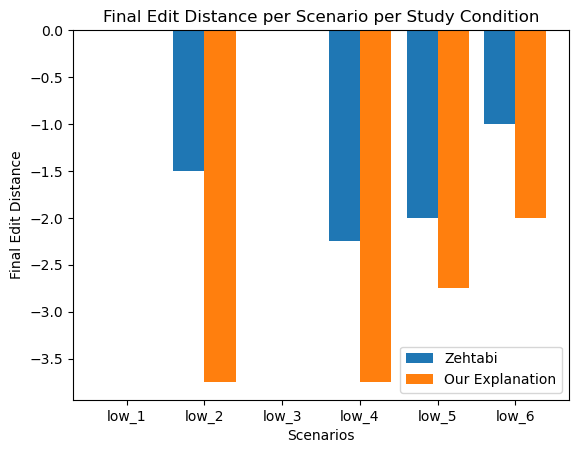

In [244]:
X = scenario_list
A = zehtabi_data
B = our_data

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, A, 0.4, label='Zehtabi et al.')
plt.bar(X_axis + 0.2, B, 0.4, label='Our Explanation')

plt.xticks(X_axis, X) 
plt.xlabel("Scenarios") 
plt.ylabel("Final Edit Distance") 
plt.title("Final Edit Distance per Scenario per Study Condition") 
plt.legend() 
plt.show() 

#### ViolinPlot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


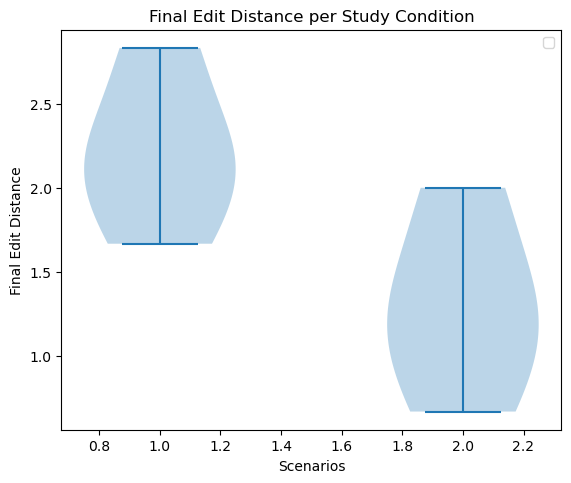

In [ ]:
A = zehtabi_data
B = our_data

C = [A, B]

fig = plt.figure(figsize =(5, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.violinplot(C)
 
plt.xlabel("Scenarios") 
plt.ylabel("Final Edit Distance") 
plt.title("Final Edit Distance per Study Condition") 
plt.legend() 
plt.show() 

### Time per Scenario Per Condition

In [229]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['elapsed_time'][p['elapsed_time'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)

for i in range(len(zehtabi_data)):
    for j in range(len(zehtabi_data[i])):
        if zehtabi_data[i][j] == 'N/A':
            zehtabi_data[i][j] = 0
            
for i in range(len(our_data)):
    for j in range(len(our_data[i])):
        if our_data[i][j] == 'N/A':
            our_data[i][j] = 0


zehtabi_data = np.average(zehtabi_data, axis=0)
our_data = np.average(our_data, axis=0)


print(zehtabi_data)
print(our_data)

[  6.   544.5   28.   253.5  495.25 283.  ]
[ 27.33333333 359.66666667   0.         318.66666667 271.
 359.33333333]


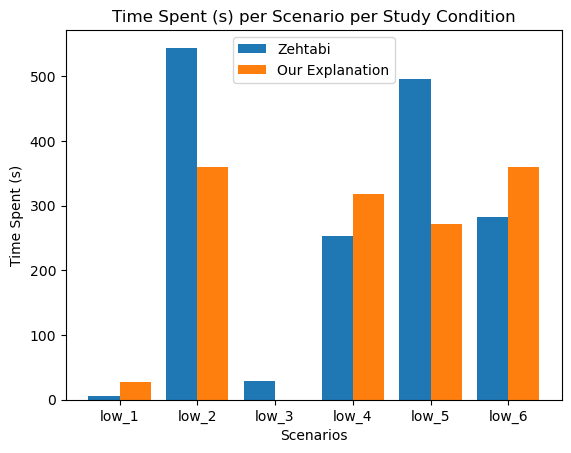

In [230]:
X = scenario_list
A = zehtabi_data
B = our_data

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, A, 0.4, label='Zehtabi et al.')
plt.bar(X_axis + 0.2, B, 0.4, label='Our Explanation')

plt.xticks(X_axis, X) 
plt.xlabel("Scenarios") 
plt.ylabel("Time Spent (s)") 
plt.title("Time Spent (s) per Scenario per Study Condition") 
plt.legend() 
plt.show() 

### Average Number of Changes per Scenario per Condition

#### Bar Graph

In [52]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['num_changes'][p['num_changes'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)

for i in range(len(zehtabi_data)):
    for j in range(len(zehtabi_data[i])):
        if zehtabi_data[i][j] == 'N/A':
            zehtabi_data[i][j] = 0
            
for i in range(len(our_data)):
    for j in range(len(our_data[i])):
        if our_data[i][j] == 'N/A':
            our_data[i][j] = 0


zehtabi_data = np.average(zehtabi_data, axis=0)
our_data = np.average(our_data, axis=0)


print(zehtabi_data)
print(our_data)

[ 0.25 10.75  0.5   6.5  10.75  3.75]
[0.  4.2 0.  4.  3.4 2.6]


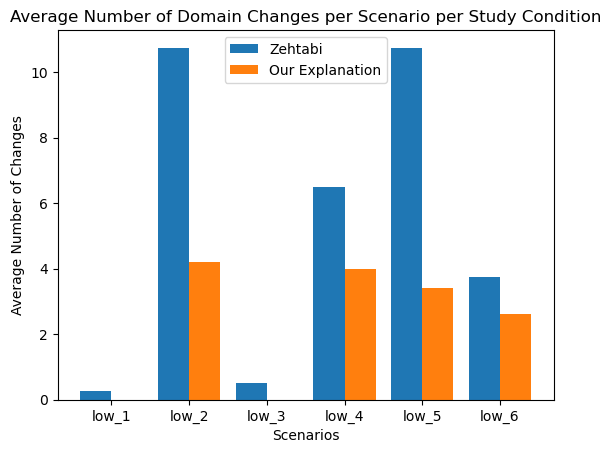

In [53]:
X = scenario_list
A = zehtabi_data
B = our_data

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, A, 0.4, label='Zehtabi et al.')
plt.bar(X_axis + 0.2, B, 0.4, label='Our Explanation')

plt.xticks(X_axis, X) 
plt.xlabel("Scenarios") 
plt.ylabel("Average Number of Changes") 
plt.title("Average Number of Domain Changes per Scenario per Study Condition") 
plt.legend() 
plt.show() 

#### Number of Changes Boxplot For Each Scenario

In [55]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['num_changes'][p['num_changes'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)

for i in range(len(zehtabi_data)):
    for j in range(len(zehtabi_data[i])):
        if zehtabi_data[i][j] == 'N/A':
            zehtabi_data[i][j] = 0
            
for i in range(len(our_data)):
    for j in range(len(our_data[i])):
        if our_data[i][j] == 'N/A':
            our_data[i][j] = 0
            

print(zehtabi_data)
print(our_data)            

[[1, 1, 0, 6, 5, 3], [0, 1, 1, 6, 8, 3], [0, 36, 0, 9, 19, 3], [0, 5, 1, 5, 11, 6]]
[[0, 4, 0, 4, 3, 1], [0, 2, 0, 4, 5, 4], [0, 5, 0, 4, 4, 4], [0, 7, 0, 3, 4, 3], [0, 3, 0, 5, 1, 1]]


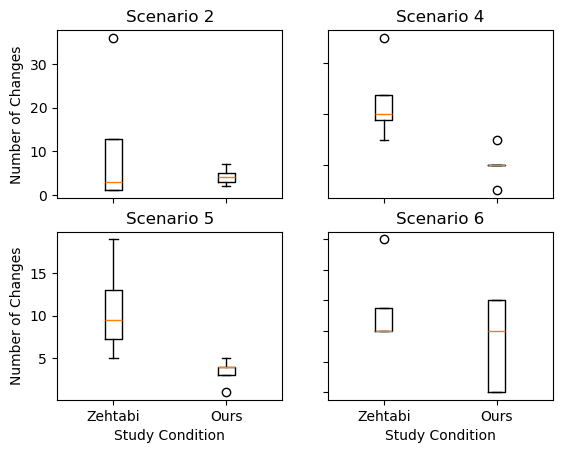

In [56]:
z2 = np.asarray(zehtabi_data)[:, 1]
o2 = np.asarray(our_data)[:, 1]

z4 = np.asarray(zehtabi_data)[:, 3]
o4 = np.asarray(our_data)[:, 3]

z5 = np.asarray(zehtabi_data)[:, 4]
o5 = np.asarray(our_data)[:, 4]

z6 = np.asarray(zehtabi_data)[:, 5]
o6 = np.asarray(our_data)[:, 5]

fig, axs = plt.subplots(2, 2)

axs[0, 0].boxplot([z2, o2])
axs[0, 0].set_title('Scenario 2')
axs[0, 1].boxplot([z4, o4])
axs[0, 1].set_title('Scenario 4')
axs[1, 0].boxplot([z5, o5])
axs[1, 0].set_title('Scenario 5')
axs[1, 1].boxplot([z6, o6])
axs[1, 1].set_title('Scenario 6')


for ax in axs.flat:
    ax.set(xlabel='Study Condition', ylabel='Number of Changes')
    ax.set_xticks([1, 2], ['Zehtabi et al.', 'Ours'])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#### Number of Changes per Study Condition

In [72]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['num_changes'][p['num_changes'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)

for i in range(len(zehtabi_data)):
    for j in range(len(zehtabi_data[i])):
        if zehtabi_data[i][j] == 'N/A':
            zehtabi_data[i][j] = 0
            
for i in range(len(our_data)):
    for j in range(len(our_data[i])):
        if our_data[i][j] == 'N/A':
            our_data[i][j] = 0
      
print(zehtabi_data)
print(our_data)

zehtabi_data = np.average(zehtabi_data, axis=1)
our_data = np.average(our_data, axis=1)      

print(zehtabi_data)
print(our_data)    

[[1, 1, 0, 6, 5, 3], [0, 1, 1, 6, 8, 3], [0, 36, 0, 9, 19, 3], [0, 5, 1, 5, 11, 6]]
[[0, 4, 0, 4, 3, 1], [0, 2, 0, 4, 5, 4], [0, 5, 0, 4, 4, 4], [0, 7, 0, 3, 4, 3], [0, 3, 0, 5, 1, 1]]
[ 2.66666667  3.16666667 11.16666667  4.66666667]
[2.         2.5        2.83333333 2.83333333 1.66666667]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


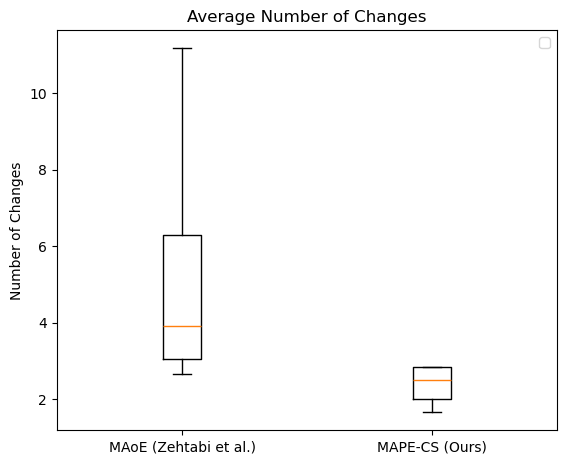

In [73]:
A = zehtabi_data
B = our_data

C = [A, B]

fig = plt.figure(figsize =(5, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(C)

plt.xticks([1, 2], ["MAoE (Zehtabi et al.)", "MAPE-CS (Ours)"])
plt.ylabel("Number of Changes") 
plt.title("Average Number of Changes") 
plt.legend() 
plt.show() 

### Ratio of Num_Changes to Final Edit Distance

In [34]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_changes_data = []
our_changes_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['num_changes'][p['num_changes'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_changes_data.append(t_data)
    else:
        our_changes_data.append(t_data)

for i in range(len(zehtabi_changes_data)):
    for j in range(len(zehtabi_changes_data[i])):
        if zehtabi_changes_data[i][j] == 'N/A':
            zehtabi_changes_data[i][j] = 0
            
for i in range(len(our_changes_data)):
    for j in range(len(our_changes_data[i])):
        if our_changes_data[i][j] == 'N/A':
            our_changes_data[i][j] = 0
      
zehtabi_changes_data = np.average(np.asarray(zehtabi_changes_data)[:, [1, 3, 4, 5]], axis=1)
our_changes_data = np.average(np.asarray(our_changes_data)[:, [1, 3, 4, 5]], axis=1)

print(zehtabi_changes_data)
print(our_changes_data)



scenario_list = ['low_2', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    t_data = []
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        t_data.append(p['final_edit_distance'][p['final_edit_distance'].index[0]])
    f = data[data['id'] == id]
    if f['study_condition'].values[0] == 1:
        zehtabi_data.append(t_data)
    else:
        our_data.append(t_data)

zehtabi_data = np.average(np.asarray(zehtabi_data), axis=1)
our_data = np.average(np.asarray(our_data), axis=1)

print(zehtabi_data)
print(our_data)

A = np.divide(zehtabi_changes_data, zehtabi_data)
B = np.divide(our_changes_data, our_data)

C = [A, B]





[ 3.75  4.5  16.75  6.75]
[3.   3.75 4.25 4.25 2.5 ]
[4.25 3.25 2.5  3.25]
[2.   2.25 1.   1.75 3.  ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


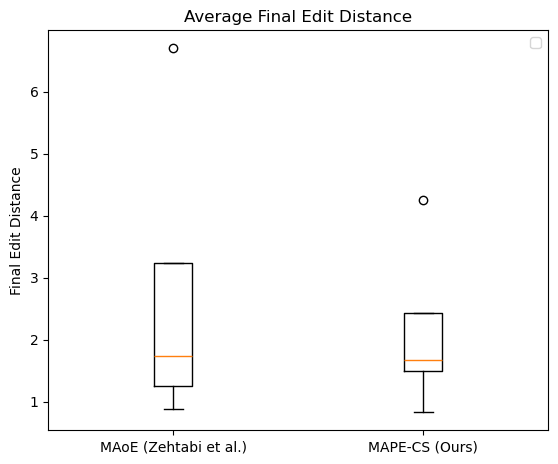

In [35]:
fig = plt.figure(figsize =(5, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(C)

plt.xticks([1, 2], ["MAoE (Zehtabi et al.)", "MAPE-CS (Ours)"])
plt.ylabel("Final Edit Distance") 
plt.title("Average Final Edit Distance") 
plt.legend() 
plt.show() 

### Confusion Matrix for Scenario Identification 

In [14]:
scenario_list = ['low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6']

zehtabi_data = []
our_data = []

for id in ids:
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for scenario in scenario_list:
        p = data[data['id'] == id]
        p = p[p['scenario'] == scenario]
        Ds = p['Ds'][p['Ds'].index[0]]
        
        user_belief = p['D_user_belief'][p['D_user_belief'].index[0]]
        
        if Ds and user_belief:
            tp = tp + 1
        elif not Ds and not user_belief:
            tn = tn + 1
        elif Ds and not user_belief:
            fp = fp + 1
        else:
            fn = fn + 1
    if p['study_condition'].values[0] == 1:
        zehtabi_data.append([tp, fp, fn, tn])
    else:
        our_data.append([tp, fp, fn, tn])

zehtabi_data = np.sum(np.asarray(zehtabi_data), axis=0)
our_data = np.sum(np.asarray(our_data), axis=0)

print(zehtabi_data)
print(our_data)

[ 6  4  2 18]
[ 5  5  2 18]


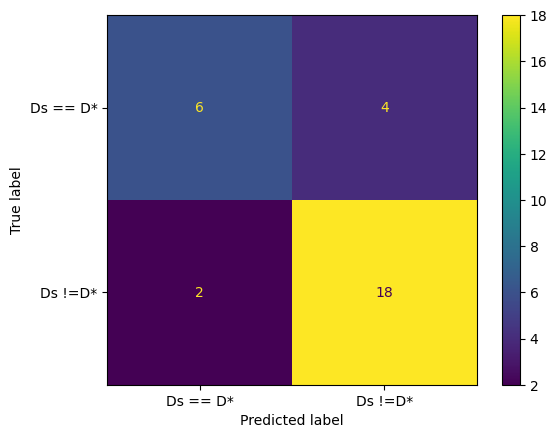

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=np.reshape(zehtabi_data, (2, 2)), display_labels=["Ds == D*", "Ds !=D*"])

disp.plot()
plt.show()

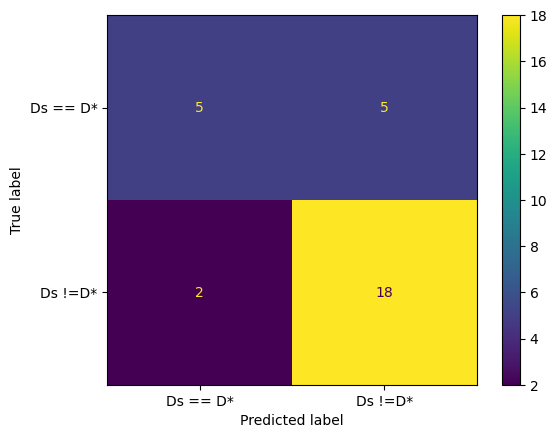

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=np.reshape(our_data, (2, 2)), display_labels=["Ds == D*", "Ds !=D*"])

disp.plot()
plt.show()

### Threshold Data and Graphs

In [75]:
# threshold_values = np.asarray(threshold_values)
t_data = []
for value in threshold_values:
    if value == 'N/A' or value == []:
        continue
    for item in value:
        t_data.append(item)

23

In [87]:
t_data = np.asarray(t_data)
t_data.shape
x = np.linspace(0, 100, 101)

Text(0, 0.5, 'Avg. Number of Factors')

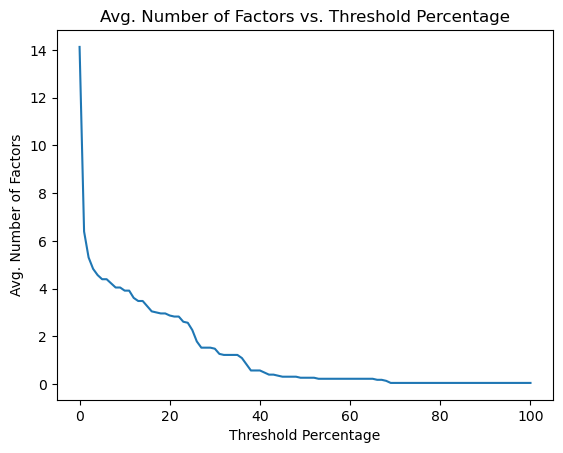

In [90]:
y = np.average(t_data, axis=0)
plt.plot(x, y)
plt.title(label="Avg. Number of Factors vs. Threshold Percentage")
plt.xlabel("Threshold Percentage")
plt.ylabel("Avg. Number of Factors")

Text(0, 0.5, 'Median Number of Factors')

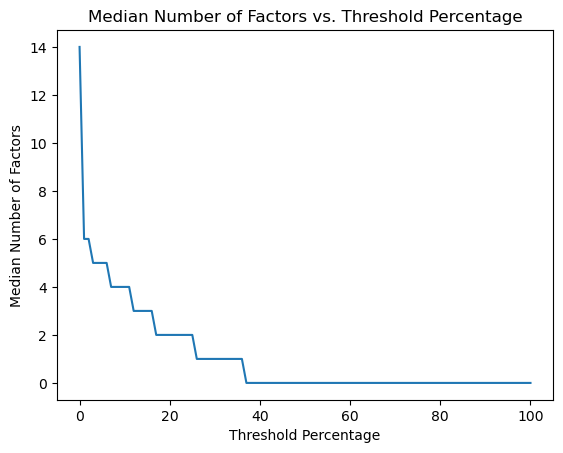

In [91]:
y = np.median(t_data, axis=0)
plt.plot(x, y)
plt.title(label="Median Number of Factors vs. Threshold Percentage")
plt.xlabel("Threshold Percentage")
plt.ylabel("Median Number of Factors")

Text(0, 0.5, 'Number of Factors')

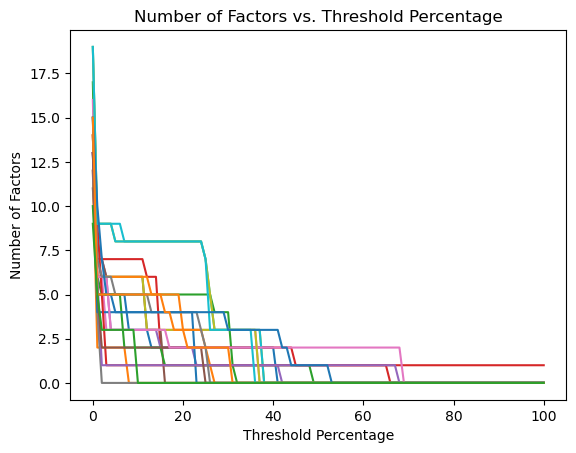

In [127]:
for d in t_data:  
    plt.plot(x, d)
plt.title(label="Number of Factors vs. Threshold Percentage")
plt.xlabel("Threshold Percentage")
plt.ylabel("Number of Factors")

Text(0, 0.5, 'Number of Factors')

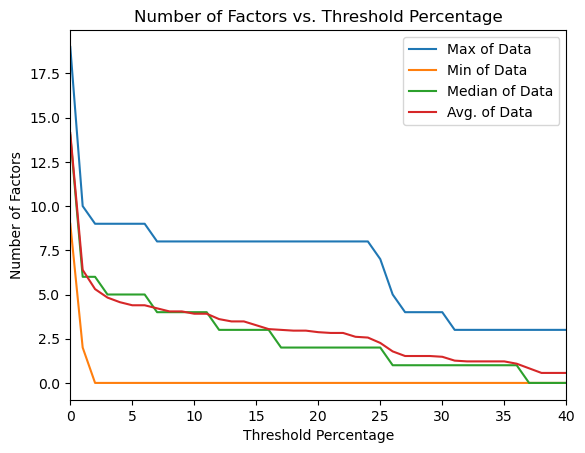

In [156]:
xmax = 40

fig, ax = plt.subplots()

ax.plot(x, np.max(t_data, axis=0), label='Max of Data')
ax.plot(x, np.min(t_data, axis=0), label='Min of Data')
ax.plot(x, np.median(t_data, axis=0), label='Median of Data')
ax.plot(x, np.mean(t_data, axis=0), label='Avg. of Data')
# plt.vlines(5, 0, 18, 'k')
ax.legend()
ax = plt.gca()
ax.set_xlim([0, xmax])
plt.title("Number of Factors vs. Threshold Percentage")
plt.xlabel("Threshold Percentage")
plt.ylabel("Number of Factors")

In [108]:
np.max(t_data, axis=1)

array([13, 12, 17, 14, 13, 11, 14, 12, 14, 19, 15, 14, 10, 13, 13, 13, 16,
       15, 19, 19, 15, 15,  9])